In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import pickle
import yaml
import seaborn as sns
import importlib

import Plots_Thesis
importlib.reload(Plots_Thesis)
from Plots_Thesis import Plotter

%load_ext autoreload
%autoreload 2

c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:285: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_ylabel('Accuracy, F1-Score in \%')
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:287: SyntaxWarning: invalid escape sequence '\%'
  ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}\%'))
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:357: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_ylabel('Accuracy, F1-Score in \%')
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:359: SyntaxWarning: invalid escape sequence '\%'
  ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}\%'))
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:373: SyntaxWarning: invalid escape sequence '\%'
  ax2.set_ylabel('Accuracy in \%')
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_clas

In [2]:
cwd = Path.cwd()
folderpath = cwd / '..' / 'Data' / 'DHG2016'

folder = 'owpg_fullyconv'


plotspath = Path(r"C:\Users\Marc\OneDrive\Studium\Masterarbeit\Schreiben\figures\Plots")

In [3]:
myplt = Plotter(output = 'thesis')

In [4]:
labels_rf = pd.read_pickle((folderpath / 'concat_sequences' / 'results_valid_labels_rf.pkl').resolve())

In [5]:
print(labels_rf.head())
sum(labels_rf['Y_hat'] == 0) / len(labels_rf)


   Fold  Y  Y_hat    Y_prob
0     1  0      0  0.702955
1     1  0      0  0.793869
2     1  0      0  0.788108
3     1  0      0  0.751598
4     1  0      0  0.777134


0.9790747956952469

In [6]:
scores_rf = pd.read_pickle((folderpath / 'concat_sequences' / 'results_scores_rf.pkl').resolve())
scores_rf['Classifier'] = 'RF'
scores_dcnn = pd.read_pickle((folderpath / 'concat_sequences' / 'results_scores_dcnn.pkl').resolve())
scores_dcnn['Classifier'] = 'DCNN'
scores_fconv = pd.read_pickle((folderpath / 'concat_sequences_fullyconv' / 'results_scores.pkl').resolve())
scores_fconv['Classifier'] = 'FCNN'
scores_concat = pd.concat([scores_rf, scores_dcnn, scores_fconv])

scores_concat.shape



(60, 15)

In [7]:
scores_concat.columns

Index(['Fold', 'accuracy_train', 'accuracy_valid', 'f1_score_train',
       'f1_score_valid', 'NLL_train', 'NLL_valid', 'Classifier', 'loss_train',
       'precision_train', 'recall_train', 'loss_valid', 'precision_valid',
       'recall_valid', 'fold_valid'],
      dtype='object')

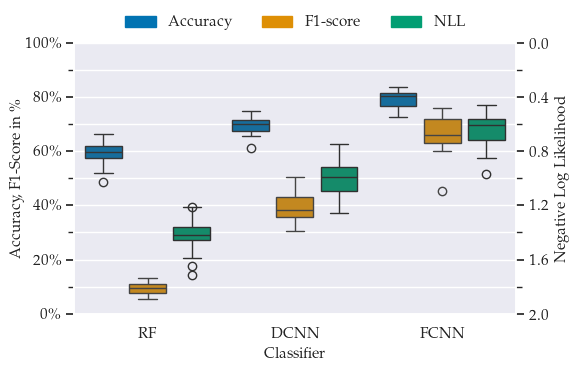

In [8]:
fig = myplt.plot_result_boxplot(scores_concat, NLLrange=[0,2], fraction = 1)

fig.savefig((plotspath / 'Results_concat.pdf').resolve(), bbox_inches='tight')

In [19]:
scores_rf = pd.read_pickle((folderpath / 'owpg_random_forest' / 'results_scores_rf.pkl').resolve())
scores_rf['Classifier'] = 'RF'
scores_dcnn = pd.read_pickle((folderpath / 'owpg_dcnn' / 'results_scores_dcnn.pkl').resolve())
scores_dcnn['Classifier'] = 'DCNN'
scores_fconv = pd.read_pickle((folderpath / 'owpg_fullyconv' / 'results_scores_fcn.pkl').resolve())
scores_fconv.rename(columns = {'accuracy_sequences_valid': 'accuracy_valid', 
                                'accuracy_sequences_train': 'accuracy_train', 
                                'F1_Score_sequences_valid': 'f1_score_valid', 
                                'F1_Score_sequences_train': 'f1_score_train', 
                                'NLL_only_important_train': 'NLL_train', 
                                'NLL_only_important_valid': 'NLL_valid'}, inplace = True)
scores_fconv['Classifier'] = 'FCNN'


scores_original = pd.DataFrame({'accuracy_valid': 0.8307, 'Source': 'Orig'}, index=[0,])
scores_tdgcn = pd.DataFrame({'accuracy_valid': 0.939, 'Source': 'TD-GCN'}, index=[0,])
scores_owpg = pd.concat([scores_rf, scores_dcnn, scores_fconv])
scores_ref = pd.concat([scores_original, scores_tdgcn])

scores_owpg.shape

(60, 20)

c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:285: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_ylabel('Accuracy, F1-Score in \%')
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:287: SyntaxWarning: invalid escape sequence '\%'
  ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}\%'))
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:357: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_ylabel('Accuracy, F1-Score in \%')
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:359: SyntaxWarning: invalid escape sequence '\%'
  ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}\%'))
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:373: SyntaxWarning: invalid escape sequence '\%'
  ax2.set_ylabel('Accuracy in \%')
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_clas

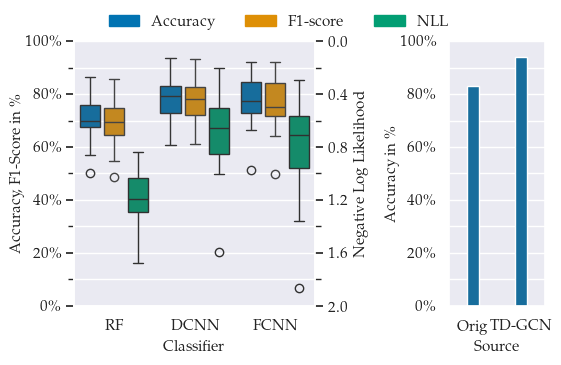

In [20]:
myplt = Plotter(output = 'thesis')

fig = myplt.plot_result_boxplot_withref(scores_owpg, scores_ref, fraction = 1)

fig.savefig((plotspath / 'Results_owpg.pdf').resolve(), bbox_inches='tight')

In [14]:
scores_rf = pd.read_pickle((folderpath / 'small_windows' / 'results_scores_rf.pkl').resolve())
scores_rf['Classifier'] = 'RF'
scores_dcnn = pd.read_pickle((folderpath / 'small_windows' / 'results_scores_dcnn.pkl').resolve())
scores_dcnn['Classifier'] = 'DCNN'

scores_small = pd.concat([scores_rf, scores_dcnn])

scores_small.shape

(40, 14)

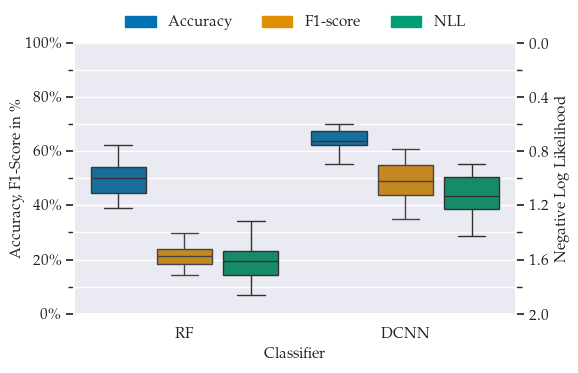

In [15]:
fig = myplt.plot_result_boxplot(scores_small, NLLrange=[0,2], fraction = 1)

fig.savefig((plotspath / 'Results_small.pdf').resolve(), bbox_inches='tight')


In [16]:
odhg_path = cwd / '..' / 'Data' / 'ODHG2024' / 'concat_sequences_fullyconv_odhg'